In [1]:
%load_ext autoreload
%autoreload 2

try: 
    from docs.helpers import plot_cwl, wrap_cwl
except (ImportError, ModuleNotFoundError) as e:

    import os
    import sys
    module_path = os.path.abspath(os.path.join('.')) # or the path to your source code
    sys.path.insert(0, module_path)

from helpers import WorkflowViewer

/home/fbrito/.local/share/hatch/env/virtual/patterns/VcrZkRRN/patterns/lib/python3.13/site-packages/cwl_wrapper/parser.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
app_cwl_file = '../cwl-workflow/pattern-3.cwl'

wf = WorkflowViewer(app_cwl_file, entrypoint="pattern-3")

## Application Package Pattern-3

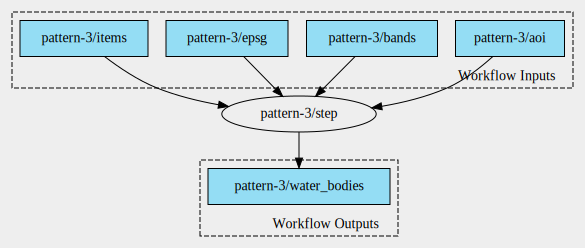

In [3]:
wf.plot()

In [4]:
wf.display_inputs()

### Inputs
| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `aoi` | string | area of interest | area of interest as a bounding box |
| `epsg` | string | EPSG code | EPSG code |
| `bands` | <cwl_utils.parser.cwl_v1_0.InputArraySchema object at 0x7a7729a21be0> | bands used for the NDWI | bands used for the NDWI |
| `items` | <cwl_utils.parser.cwl_v1_0.InputArraySchema object at 0x7a7729ab6d50> | Landsat-8/9 acquisition reference | Landsat-8/9 acquisition reference |


In [5]:
wf.display_steps()

### Steps
| Id | Runs | Label | Doc |
| --- | --- | --- | --- |
| `step` | file:///#clt | None | None |


In [6]:
wf.display_outputs()

### Outputs
| Id | Type | Label | Doc |
| --- | --- | --- | --- |
| `water_bodies` | <cwl_utils.parser.cwl_v1_0.OutputArraySchema object at 0x7a7729a21d30> | Water bodies detected | Water bodies detected based on the NDWI and otsu threshold |
